In [1]:
"""
This code belongs to the paper:
-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for SDOF Duffing x final prediction.
"""

'\nThis code belongs to the paper:\n-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for SDOF Duffing x final prediction.\n'

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_DUFFING.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
dW.shape

(10000, 60001)

In [3]:

import numpy as np

"""
A Duffing system excited by random noise
----------------------------------------------------------------------
"""
def duffing(x1, x2, T):

    # parameters of Duffing oscillator in Equation
    m = 1
    c = 0.9934
    k = 999.485
    k3 = 99989.5
    sigma = 10.01
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 1000 # no. of samples in the run
    
    y1 = []
    y2 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2])
        x = np.vstack(x0)  # Zero initial condition.
        if (ensemble%10)==0:
            print(ensemble)
        for n in range(len(t)-1):
            a1 = x0[1]
            a2 = -(c/m)*x0[1]-(k/m)*x0[0]-(k3/m)*(x0[0]**3)
            b2 = (sigma/m)*x0[0] 

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW[ensemble][n] 
            x0 = np.array([sol1, sol2])
            x = np.column_stack((x, x0))
        y1.append(x[0,:])
        y2.append(x[1,:])
        
        
        
    y1 = np.array(y1)
    y2 = np.array(y2)
    return y1, y2

In [4]:
T = 30

# Response generation:
x1, x2 = 0.05, 0.05 # initial displacement for duffing
y1, y2 = duffing(x1, x2, T)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


Text(0.5, 1.0, 'Velocity')

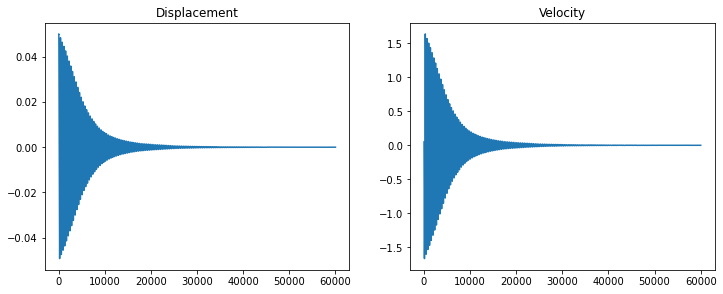

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1); plt.plot(np.mean(y1, axis=0))
plt.title('Displacement')
plt.subplot(2,2,2); plt.plot(np.mean(y2, axis=0))
plt.title('Velocity')

(1000, 60001)


Text(0.5, 1.0, 'Velocity')

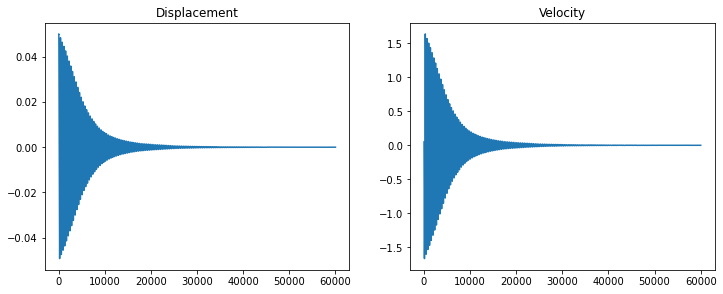

In [6]:
for i in y1:
    if max(i)<1000:
#         print(max(i))
        pass

a = []

for i in y1:
    
    if np.mean(i)<1000:
#         print(np.mean(i))
        a.append(i)
a

a = np.array(a)
print(a.shape)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1); plt.plot(np.mean(a, axis=0))
plt.title('Displacement')
plt.subplot(2,2,2); plt.plot(np.mean(y2, axis=0))
plt.title('Velocity')

Text(0.5, 1.0, 'Displacement')

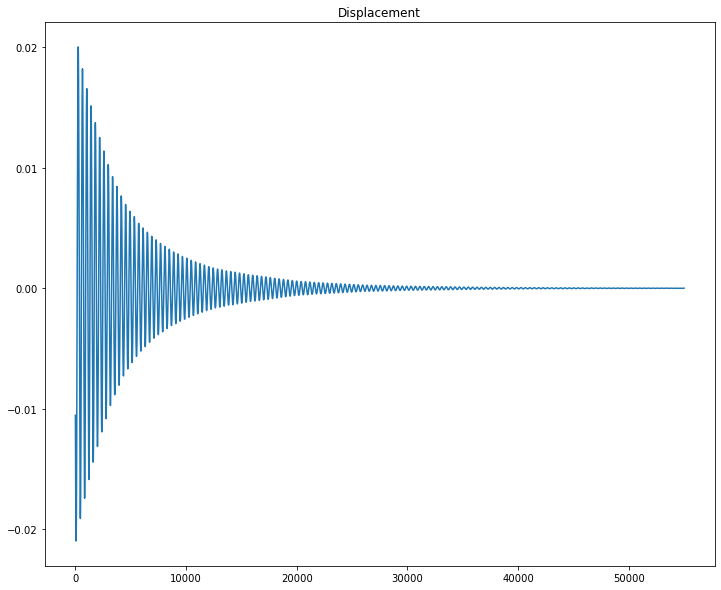

In [7]:
fig = plt.figure(figsize=(12,10))
plt.plot(np.mean(a, axis=0)[5000:])
plt.title('Displacement')
# plt.subplot(2,2,2); plt.plot(np.mean(y2, axis=0))
# plt.title('Velocity')

In [8]:
output = [y1, y2]

In [9]:
import pickle 

pickle.dump(output, open('Duffing_Final_relia_with_x_100ensem_c2.p', 'wb'))

In [10]:
output[0].shape

(1000, 60001)